# MOVIE LENS PROJECT ANALYSIS

## 1. Prepare Problem

In [1]:
# a) Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# b) Load dataset
movie_data = pd.read_csv("movies.dat", sep="::", header=None, names=['MovieID','Title','Genres'], 
                       dtype={'MovieID': np.int32, 'Title': np.str, 'Genres': np.str}, engine='python')
users_data = pd.read_csv("users.dat", sep="::", header=None, names=['UserID','Gender','Age','Occupation','Zip-code'], 
    dtype={'UserID': np.int32, 'Gender': np.str, 'Age': np.int32, 'Occupation' : np.int32, 'Zip-code' : np.str}, engine='python')
ratings_data = pd.read_csv("ratings.dat", sep="::", header=None, names=['UserID','MovieID','Rating','Timestamp'], 
                dtype={'UserID': np.int32, 'MovieID': np.int32, 'Rating': np.int32, 'Timestamp' : np.str}, engine='python')

## 2. Summarize Data

In [3]:
# a) Descriptive statistics 
# On movie_data
movie_data.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movie_data.shape

(3883, 3)

In [5]:
# Results show that no columns are empty or null
movie_data.isnull().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [6]:
movie_data.describe()

,MovieID
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [7]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int32 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int32(1), object(2)
memory usage: 76.0+ KB


In [8]:
# On users data
users_data.shape

(6040, 5)

In [9]:
users_data.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [10]:
users_data.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [11]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int32 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int32 
 3   Occupation  6040 non-null   int32 
 4   Zip-code    6040 non-null   object
dtypes: int32(3), object(2)
memory usage: 165.3+ KB


In [12]:
# Results show that no columns are empty or null
users_data.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [13]:
# On Ratings data
ratings_data.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [14]:
ratings_data.shape

(1000209, 4)

In [15]:
ratings_data.describe()

,UserID,MovieID,Rating
count,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00
std,1.728413e+03,1.096041e+03,1.117102e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00
max,6.040000e+03,3.952000e+03,5.000000e+00


In [16]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   UserID     1000209 non-null  int32 
 1   MovieID    1000209 non-null  int32 
 2   Rating     1000209 non-null  int32 
 3   Timestamp  1000209 non-null  object
dtypes: int32(3), object(1)
memory usage: 19.1+ MB


In [17]:
# Results show that no columns are empty or null
ratings_data.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

## 3. Data Visualizations

### User Age Distribution 

In [18]:
age_group = users_data.groupby('Age').size()
age_group

Age
1      222
18    1103
25    2096
35    1193
45     550
50     496
56     380
dtype: int64

In [19]:
# plt.hist(data=age_group,x=users_data.Age, bins=30)
plt.show()

*The above age distribution shows that most of the users are 25 years old*

### GenderDistribution

In [20]:
gender_group = users_data.groupby('Gender').size()
gender_group

Gender
F    1709
M    4331
dtype: int64

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

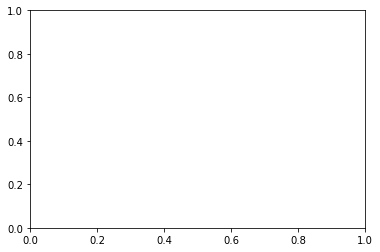

In [21]:
plt.hist(data=gender_group,x=users_data.Gender)
plt.show()

The above distribution shows that most of the users are Males

### User Ratings

In [ ]:
user_group = ratings_data.groupby(['UserID']).size()
user_group.head(10)

In [ ]:
plt.figure(figsize=(25,10))
plt.hist(x=[ratings_data.UserID], bins=1000)
plt.show()

### Toystory data

In [ ]:
toystory_data = ratings_data[ratings_data.MovieID==1]
toystory_data.head(10)

In [ ]:
toystory_data.groupby('Rating').size()

In [ ]:
toystory_data_group = toystory_data.groupby('Rating')
toystory_data_group.agg({'Rating':'mean'})

In [ ]:
plt.hist(x=toystory_data['Rating'])
plt.show()

The above plot shows that the movie 'Toystory' has got 4 ** (stars) maximum

Viewership by Age for Toystory

In [ ]:
viewership = pd.merge(ratings_data, users_data, how='left', left_on=['UserID'], right_on=['UserID'])

In [ ]:
viewership.shape

In [ ]:
ratings_data.shape

In [ ]:
viewership.head()

In [ ]:
#select only 'Toystory' data
viewership_of_toystory = viewership[viewership['MovieID'] == 1]
viewership_of_toystory.shape

In [ ]:
viewership_of_toystory.head()

In [ ]:
viewership_of_toystory.groupby('Age').size()

In [ ]:
plt.hist(x=viewership_of_toystory['Age'], data=viewership_of_toystory, bins=20)
plt.xlabel("Age of viewers")
plt.ylabel("No of views")
plt.title("Viewership data of Toystory movie")
plt.show()

### The above plot shows that the Toystory movie is more popular for viewers between Age group 20-25 years 

### Top 25 movies by viewership rating 

In [ ]:
movie_rating = ratings_data.groupby(['MovieID'], as_index=False)
average_movie_ratings = movie_rating.agg({'Rating':'mean'})
top_25_movies = average_movie_ratings.sort_values('Rating', ascending=False).head(25)
top_25_movies

In [ ]:
#The below list shows top 25 movies by viewership data
pd.merge(top_25_movies, movie_data, how='left', left_on=['MovieID'], right_on=['MovieID'])

### Rating of userid = 2696 

In [ ]:
user_rating_data = ratings_data[ratings_data['UserID']==2696]
user_rating_data.head()

In [ ]:
# plotting the above data
plt.scatter(x=user_rating_data['MovieID'], y=user_rating_data['Rating'])
plt.show()

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(user_rating_data)
plt.show()

## 4. Prepare Data 

In [ ]:
few_viewership = viewership.head(500)
few_viewership.shape

In [ ]:
few_viewership.head()

In [ ]:
# preprocess data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(few_viewership['Age'])
x_age = le.transform(few_viewership['Age'])
x_age

In [ ]:
le.fit(few_viewership['Occupation'])
x_occ = le.transform(few_viewership['Occupation'])
x_occ

In [ ]:
le.fit(few_viewership['MovieID'])
x_movieid = le.transform(few_viewership['MovieID'])
x_movieid

In [ ]:
few_viewership['New Age'] = x_age
few_viewership['New Occupation'] = x_occ
few_viewership['New MovieID'] = x_movieid

In [ ]:
# Feature Selection
x_input = few_viewership[['New Age','New Occupation','New MovieID']]
y_target = few_viewership['Rating']

In [ ]:
x_input.head()

## 5. Evaluate Algorithms

In [ ]:
# Split-out validation dataset
x_train, x_test, y_train, y_test = train_test_split(x_input, y_target, test_size=0.25)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
from sklearn.linear_model import LogisticRegression
logitReg = LogisticRegression()
lm = logitReg.fit(x_train, y_train)

In [ ]:
result = logitReg.predict(x_test)

In [ ]:
estimated = pd.Series(result, name='Estimated Values')

In [ ]:
final_result = pd.concat([y_test, estimated], axis=1)

In [ ]:
# Test options and evaluation metric
print (accuracy_score(y_test, result))
print (confusion_matrix(y_test, result))
print (classification_report(y_test, result))

Accuracy of the above matrix is *** %

In [ ]:
# Plot the histogram
plt.figure(figsize=(20,10))
plt.hist(x=x_input)
plt.legend()
plt.show()

In [ ]:
# Spot-Check Algorithms
seed = 7
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()